In [1]:
include("Main_geodesics_try.jl")
addprocs(15); #RUN ONLY ONCE PER SESSION!
@everywhere begin
    using SharedArrays
    include("Spacetime.jl")
    include("Integrator.jl")
    include("GeodesicEquationsEtc.jl")
    include("AccretionDiskProfiles.jl")
end

In [2]:
nprocs() #Check processor number

16

In [4]:
@everywhere begin
    function Mass()
        return 1
    end
    
    function g_uv(x)
        return Ghosh(x)
    end
    
    function Charge()
        return 0
    end

    function integr(x,u,e)
        return RKF45(x,u,e)
    end

    function Spin()
        return 0.98999*0.9
    end

    function NewScale() 
        return 0.01
    end
end

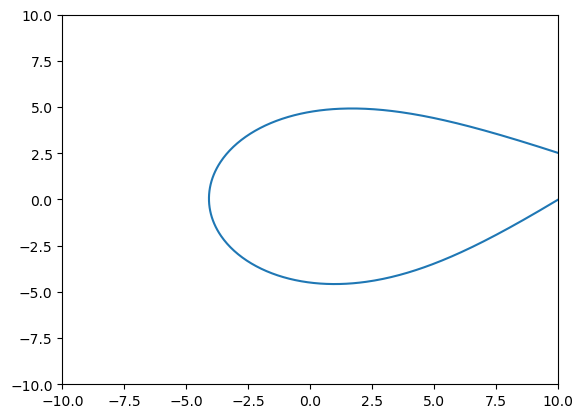

(-10.0, 10.0)

In [7]:
x0      = [0.0, 10.0, pi/2, 0.0]    # Initial position
u0      = [0,-1,0,-0.080341]         # Initial velocity
t_end   = 2000                      # Integration time
Eps     = 0                         # Particle type             (0 for null, 1 for timelike)

# Optional
# dt        (Timesteps,                                         default = 0.1)
# int_dir   (Integration direction [1 Forward, -1 backward],    default = 1)

# Backward integration means the particle is 'coming' to the initial position
# Forward integration means the particle is 'going' from the initial position

xup = main_geodesics(x0,u0,Eps,t_end,int_dir=1)

x_plot =@. xup[2,:]*cos(xup[4,:])
y_plot =@. xup[2,:]*sin(xup[4,:])

fig, ax = subplots()
ax.plot(x_plot,y_plot)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

r_ISCO = 2.3158563385104345


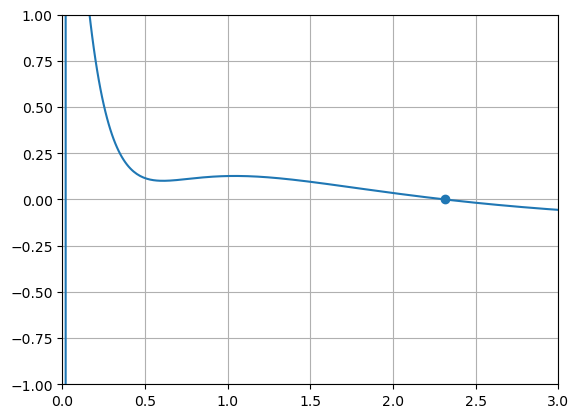

In [8]:
# Check the ISCO! 
check_isco(3,1,limx=[0,3])

In [11]:
#-------------- main_raytracing option --------------#
# resx, resy                                (Resolution x,y)
# th0                                       (Inclination angle)
# FoV                                       (Field of view)
# prograde, dopshift, allshift, thickacc    (Accretion disk properties [true or false])
# r_guess                                   (Value for guessing roots to find ISCO)
# err_low, err_high                         (Error tolerance)

#-------------- default value --------------#
# 500,500
# pi/2
# 12*Mass()
# true, true, true, false
# 3*Mass()
# 1e-8, 1e-6

Image, Phirec, Trec, NegativeR = main_raytracing(resx=100,resy=100,th0=0.3,r_guess=0.6, allshift=true);

2.3158563713776683
      From worker 10:	57
      From worker 15:	89
      From worker 7:	36
      From worker 3:	8
      From worker 2:	1
      From worker 5:	22
      From worker 6:	29
      From worker 14:	83
      From worker 11:	64
      From worker 8:	43
      From worker 16:	95
      From worker 12:	71
      From worker 4:	15
      From worker 13:	77
      From worker 9:	50
      From worker 3:	9
      From worker 2:	2
      From worker 15:	90
      From worker 16:	96
      From worker 13:	78
      From worker 4:	16
      From worker 14:	84
      From worker 5:	23
      From worker 7:	37
      From worker 8:	44
      From worker 10:	58
      From worker 6:	30
      From worker 12:	72
      From worker 11:	65
      From worker 3:	10
      From worker 16:	97
      From worker 13:	79
      From worker 15:	91
      From worker 9:	51
      From worker 4:	17
      From worker 2:	3
      From worker 14:	85
      From worker 5:	24
      From worker 7:	38
      From worker 8:	45
      Fr

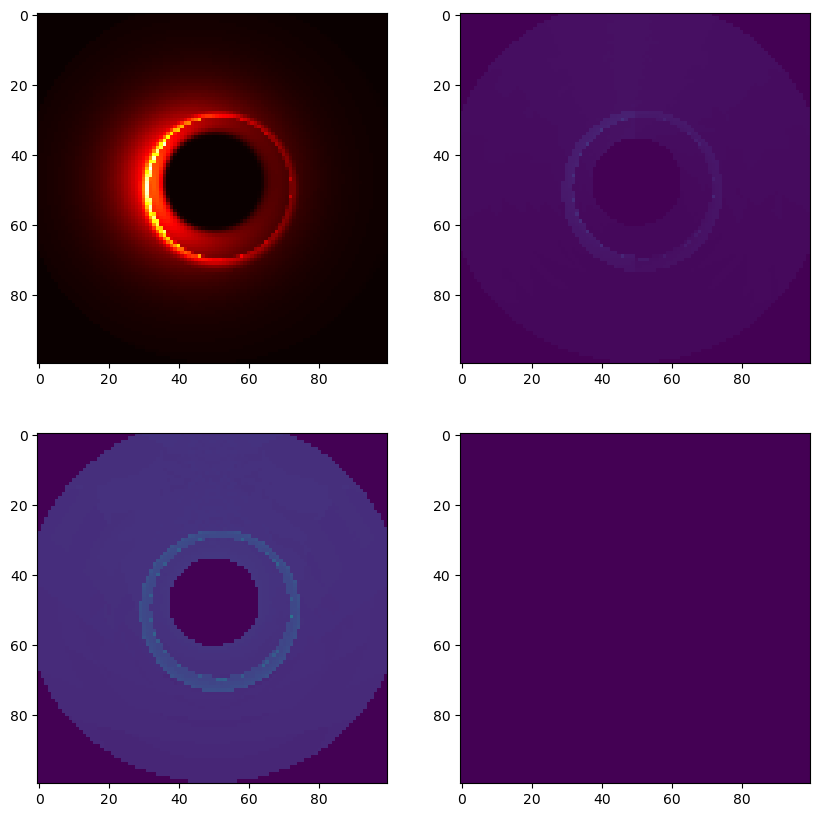

In [12]:
fig, ax = subplots(ncols=2,nrows=2)
ax[1,1].imshow(Image,cmap="hot")
ax[1,2].imshow(Phirec,vmin=0,vmax=80)
ax[2,1].imshow(Trec,alpha=1,vmin=480,vmax=700)
ax[2,2].imshow(NegativeR)
# ax.imshow(NegativeR)
fig.set_size_inches(10,10)